In [1]:
from tmg_hmc import TMGSampler 
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

# Positivity

In [2]:
np.random.seed(0)
# N([1, 1], I) with x2 >= 0
mu = np.array([1.0, 1.0]).reshape(-1, 1)
sigma = np.eye(2) 
sampler = TMGSampler(mu, sigma)

# Add positivity constraint f^T x >= c
f = np.array([[0.0, 1.0]])
c = 0
sampler.add_constraint(f=f, c=c) 
print(type(sampler.constraints[0])) # Linear constraint is inferred by sampler

<class 'tmg_hmc.constraints.LinearConstraint'>


In [3]:
# Initialize at a point satisfying the constraint
x0 = np.array([3.0, 2.0]).reshape(-1, 1)
samples = sampler.sample(x0, n_samples=1000, burn_in=1000)

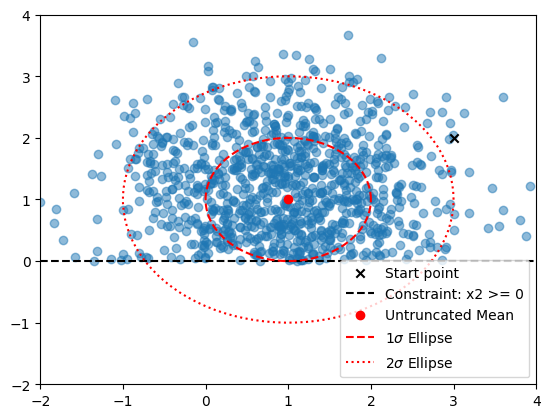

In [4]:
fig, ax = plt.subplots()
ax.scatter(samples[:, 0], samples[:, 1], alpha=0.5)
ax.scatter(x0[0], x0[1], color='k', marker='x', label='Start point')
ax.plot([-2, 4], [0, 0], 'k--', label='Constraint: x2 >= 0')
# Plot true mean and 1 sigma ellipse
ax.scatter(mu[0], mu[1], color='red', label='Untruncated Mean')
theta = np.linspace(0, 2 * np.pi, 100)
ellipse = np.array([mu + sigma @ np.array([np.cos(theta_i), np.sin(theta_i)]).reshape(-1, 1) for theta_i in theta])
ax.plot(ellipse[:, 0], ellipse[:, 1], color='red', linestyle='--', label=r'1$\sigma$ Ellipse')
ellipse2 = np.array([mu + 2 * sigma @ np.array([np.cos(theta_i), np.sin(theta_i)]).reshape(-1, 1) for theta_i in theta])
ax.plot(ellipse2[:, 0], ellipse2[:, 1], color='red', linestyle=':', label=r'2$\sigma$ Ellipse')
ax.set_ylim([-2, 4])
ax.set_xlim([-2, 4])
ax.legend()
plt.show()

# Bounded Magnitude

In [5]:
mu = np.array([0.0, 0.0]).reshape(-1, 1)
sigma = np.eye(2)

# Add bounded magnitude constraint x^T A x <= c
A = np.array([[0.0, 0.0], [0.0, -1.0]])
c = 1
sampler = TMGSampler(mu, sigma)
sampler.add_constraint(A=A, c=c)
print(type(sampler.constraints[0])) # Simple Quadratic constraint is inferred by sampler

<class 'tmg_hmc.constraints.SimpleQuadraticConstraint'>


In [6]:
# Initialize at a point satisfying the constraint
x0 = np.array([3.0, 0.0]).reshape(-1, 1)
samples = sampler.sample(x0, n_samples=1000, burn_in=1000)

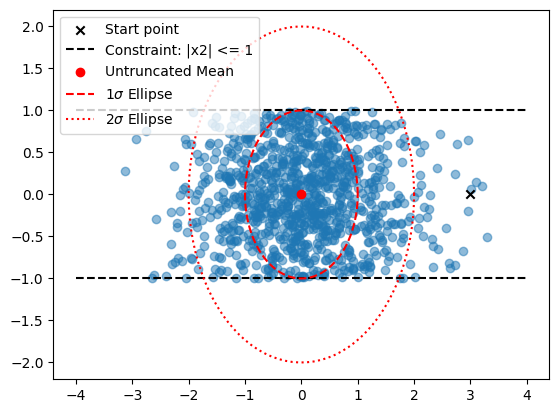

In [7]:
fig, ax = plt.subplots()
ax.scatter(samples[:, 0], samples[:, 1], alpha=0.5)
ax.scatter(x0[0], x0[1], color='k', marker='x', label='Start point')
ax.plot([-4, 4], [1, 1], 'k--', label='Constraint: |x2| <= 1')
ax.plot([-4, 4], [-1, -1], 'k--')
# Plot true mean and 1 sigma ellipse
ax.scatter(mu[0], mu[1], color='red', label='Untruncated Mean')
theta = np.linspace(0, 2 * np.pi, 100)
ellipse = np.array([mu + sigma @ np.array([np.cos(theta_i), np.sin(theta_i)]).reshape(-1, 1) for theta_i in theta])
ax.plot(ellipse[:, 0], ellipse[:, 1], color='red', linestyle='--', label=r'1$\sigma$ Ellipse')
ellipse2 = np.array([mu + 2 * sigma @ np.array([np.cos(theta_i), np.sin(theta_i)]).reshape(-1, 1) for theta_i in theta])
ax.plot(ellipse2[:, 0], ellipse2[:, 1], color='red', linestyle=':', label=r'2$\sigma$ Ellipse')
ax.legend()
plt.show()

# Bounded Ellipsoid

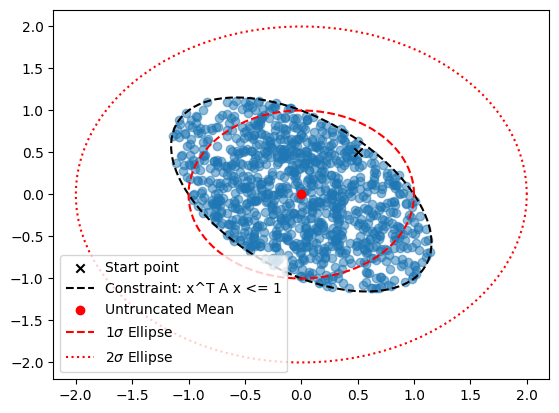

In [8]:
mu = np.array([0.0, 0.0]).reshape(-1, 1)
sigma = np.eye(2)
# Bounded Outside Ellipsoid
sampler = TMGSampler(mu, sigma)
A = -np.array([[1,0.5],[0.5,1]])
c = 1
sampler.add_constraint(A=A, c=c) # X1^2 + X2^2 + X1 X2 <= 1
x0 = np.array([0.5,0.5]).reshape(-1, 1)
samples = sampler.sample(x0, 1000, 100)


# Scatter plot
fig, ax = plt.subplots()
ax.scatter(samples[:, 0], samples[:, 1], alpha=0.5)
ax.scatter(x0[0], x0[1], color='k', marker='x', label='Start point')
# Plot constraint boundary
theta = np.linspace(0, 2 * np.pi, 100)
sqA = sp.linalg.cholesky(np.linalg.inv(-A))
ellipse = np.array([sqA.T @ np.array([np.cos(theta_i), np.sin(theta_i)]).reshape(-1, 1) for theta_i in theta])
ax.plot(ellipse[:, 0], ellipse[:, 1], 'k--', label='Constraint: x^T A x <= 1')
# Plot true mean and 1 sigma ellipse
ax.scatter(mu[0], mu[1], color='red', label='Untruncated Mean')
theta = np.linspace(0, 2 * np.pi, 100)
ellipse = np.array([mu + sigma @ np.array([np.cos(theta_i), np.sin(theta_i)]).reshape(-1, 1) for theta_i in theta])
ax.plot(ellipse[:, 0], ellipse[:, 1], color='red', linestyle='--', label=r'1$\sigma$ Ellipse')
ellipse2 = np.array([mu + 2 * sigma @ np.array([np.cos(theta_i), np.sin(theta_i)]).reshape(-1, 1) for theta_i in theta])
ax.plot(ellipse2[:, 0], ellipse2[:, 1], color='red', linestyle=':', label=r'2$\sigma$ Ellipse')
ax.legend()
plt.show()

# Bounded Outside Ellipsoid

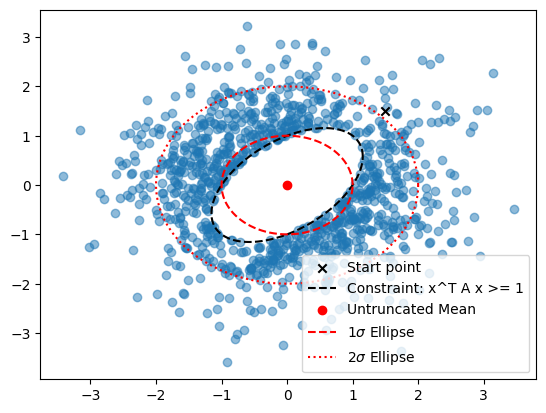

In [9]:
mu = np.array([0.0, 0.0]).reshape(-1, 1)
sigma = np.eye(2)
# Bounded Outside Ellipsoid
sampler = TMGSampler(mu, sigma)
A = np.array([[1,-0.5],[-0.5,1]])
c = -1
sampler.add_constraint(A=A, c=c) # X1^2 + X2^2 - X1 X2 >= 1
x0 = np.array([1.5,1.5]).reshape(-1, 1)
samples = sampler.sample(x0, 1000, 100)


# Scatter plot
fig, ax = plt.subplots()
ax.scatter(samples[:, 0], samples[:, 1], alpha=0.5)
ax.scatter(x0[0], x0[1], color='k', marker='x', label='Start point')
# Plot constraint boundary
theta = np.linspace(0, 2 * np.pi, 100)
sqA = sp.linalg.cholesky(np.linalg.inv(A))
ellipse = np.array([sqA.T @ np.array([np.cos(theta_i), np.sin(theta_i)]).reshape(-1, 1) for theta_i in theta])
ax.plot(ellipse[:, 0], ellipse[:, 1], 'k--', label='Constraint: x^T A x >= 1')
# Plot true mean and 1 sigma ellipse
ax.scatter(mu[0], mu[1], color='red', label='Untruncated Mean')
theta = np.linspace(0, 2 * np.pi, 100)
ellipse = np.array([mu + sigma @ np.array([np.cos(theta_i), np.sin(theta_i)]).reshape(-1, 1) for theta_i in theta])
ax.plot(ellipse[:, 0], ellipse[:, 1], color='red', linestyle='--', label=r'1$\sigma$ Ellipse')
ellipse2 = np.array([mu + 2 * sigma @ np.array([np.cos(theta_i), np.sin(theta_i)]).reshape(-1, 1) for theta_i in theta])
ax.plot(ellipse2[:, 0], ellipse2[:, 1], color='red', linestyle=':', label=r'2$\sigma$ Ellipse')
ax.legend()
plt.show()

# Parabolic

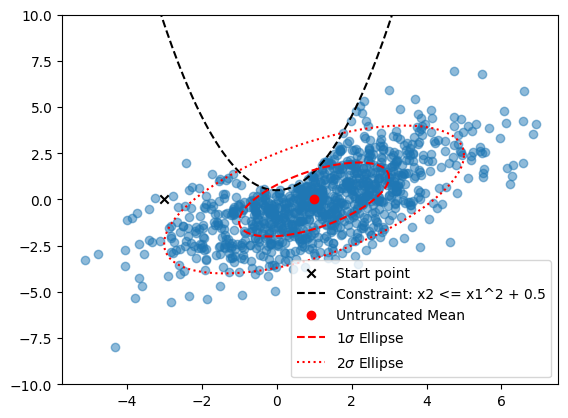

In [10]:
mu = np.array([1.0, 0.0]).reshape(-1, 1)
sigma = 4*np.array([[1.0, 0.6], [0.6, 1.0]])
sampler = TMGSampler(mu, sigma, gpu=False)
sampler.add_constraint(A=np.array([[1.,0],[0,0]]), f=np.array([0,-1.]), c=0.5, sparse=True, compiled=True) # X2 <= X1^2 + 0.5

x0 = np.array([-3.0,0.0]).reshape(-1, 1)
samples = sampler.sample(x0, 1000, 100)
# Scatter plot
fig, ax = plt.subplots()
ax.scatter(samples[:, 0], samples[:, 1], alpha=0.5)
ax.scatter(x0[0], x0[1], color='k', marker='x', label='Start point')
# Plot constraint boundary
x_vals = np.linspace(-5, 5, 200)
y_vals = x_vals**2 + 0.5
ax.plot(x_vals, y_vals, 'k--', label='Constraint: x2 <= x1^2 + 0.5')
# Plot true mean and 1 sigma ellipse
ax.scatter(mu[0], mu[1], color='red', label='Untruncated Mean')
theta = np.linspace(0, 2 * np.pi, 100)
ellipse = np.array([mu + sp.linalg.cholesky(sigma).T @ np.array([np.cos(theta_i), np.sin(theta_i)]).reshape(-1, 1) for theta_i in theta])
ax.plot(ellipse[:, 0], ellipse[:, 1], color='red', linestyle='--', label=r'1$\sigma$ Ellipse')
ellipse2 = np.array([mu + 2 * sp.linalg.cholesky(sigma).T @ np.array([np.cos(theta_i), np.sin(theta_i)]).reshape(-1, 1) for theta_i in theta])
ax.plot(ellipse2[:, 0], ellipse2[:, 1], color='red', linestyle=':', label=r'2$\sigma$ Ellipse')
ax.legend()
plt.ylim([-10,10])
plt.show()